In [3]:
from tensorflow import keras
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import  Dense, Flatten
from keras.datasets import fashion_mnist


**Loading the dataset**


In [31]:
(train_images, train_labels),(test_images, test_labels)= fashion_mnist.load_data()


In [32]:
class_names=['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'] # Specifying the classnames that the data will belong to

# **Data Exploration**

Each image is 28×28 pixels

In [33]:
train_images.shape, test_images.shape, train_labels.shape, test_labels.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [34]:
train_labels    # The labels are integers from 0-9

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

# **Visualization**

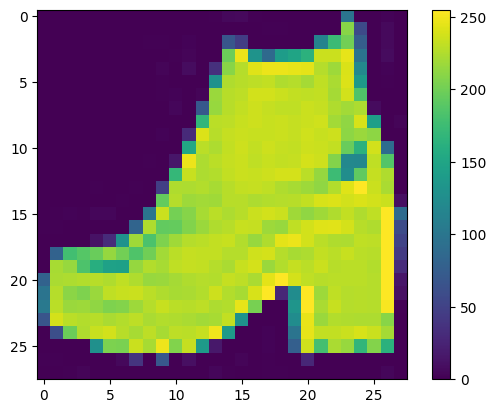

In [38]:
# Randomly select an index for displaying an image
random_index = np.random.randint(0, len(train_images))

# Plot the image with a color bar and no grid
plt.figure()
plt.imshow(train_images[random_index])
plt.colorbar()
plt.grid(False)
plt.show()


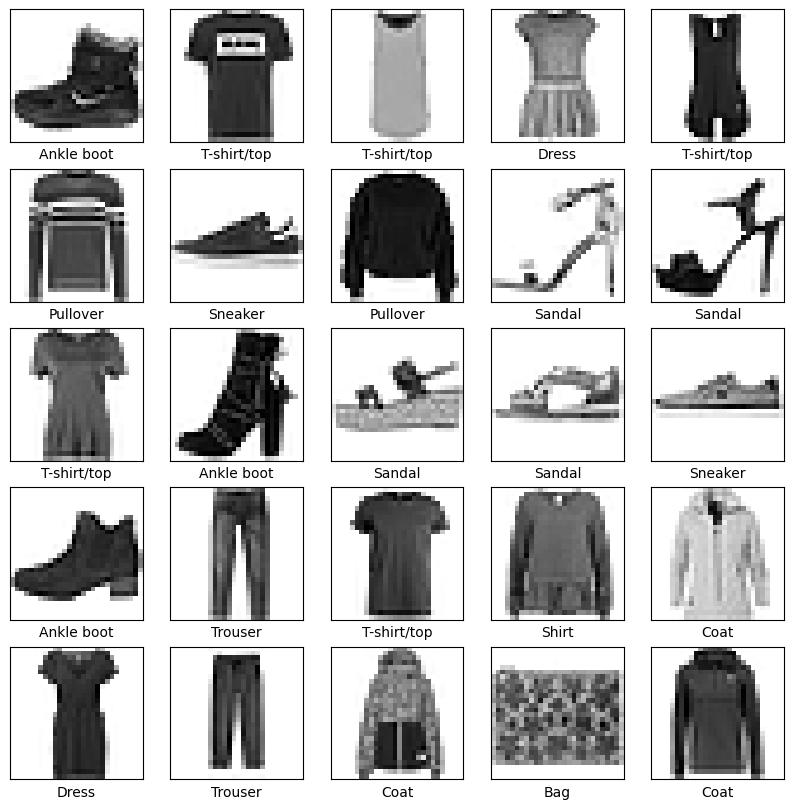

In [39]:
# Visualization of first 25 item in training with its label
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# **Data Preprocessing**

In [40]:
# Scaling the images
train_images= train_images/255.0
test_images= test_images/255.0

# **Building the layers architecture using FNN**

In [41]:
model=Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [42]:
model.compile(optimizer='adam', loss='SparseCategoricalCrossentropy', metrics=['accuracy'])

**Training the model**

In [43]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7770 - loss: 0.6410
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8593 - loss: 0.3898
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8711 - loss: 0.3455
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8821 - loss: 0.3151
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8922 - loss: 0.2931
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8961 - loss: 0.2800
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9005 - loss: 0.2685
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9055 - loss: 0.2539
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9086 - loss: 0.2458
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9084 - loss: 0.2397


**Accuracy Evaluation**

In [44]:
test_loss, test_acc = model.evaluate(test_images,  test_labels)

print('\nTest accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8843 - loss: 0.3279

Test accuracy: 0.8831999897956848


# **Make predictions**

In [45]:
predictions= model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


**Predictions verification**

In [63]:
# Function to plot the image with its prediction
def plot_image(i, predictions_array, true_label, img):
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img[i], cmap='gray')  # Display the image

    # Get the predicted and true labels
    predicted_label = np.argmax(predictions_array)
    true_label = true_label[i]

    # Set the color based on whether the prediction is correct
    color = 'blue' if predicted_label == true_label else 'red'

    # Add the label with confidence score
    plt.xlabel(f"{class_names[predicted_label]} {100*np.max(predictions_array):.2f}% ({class_names[true_label]})", color=color)


# Function to plot the prediction probability as a bar graph
def plot_value_array(i, predictions_array, true_label):
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])

    predicted_label = np.argmax(predictions_array)

    # Highlight the predicted and true label bars
    plt.bar(predicted_label, predictions_array[predicted_label], color='red')
    plt.bar(true_label[i], predictions_array[true_label[i]], color='blue')



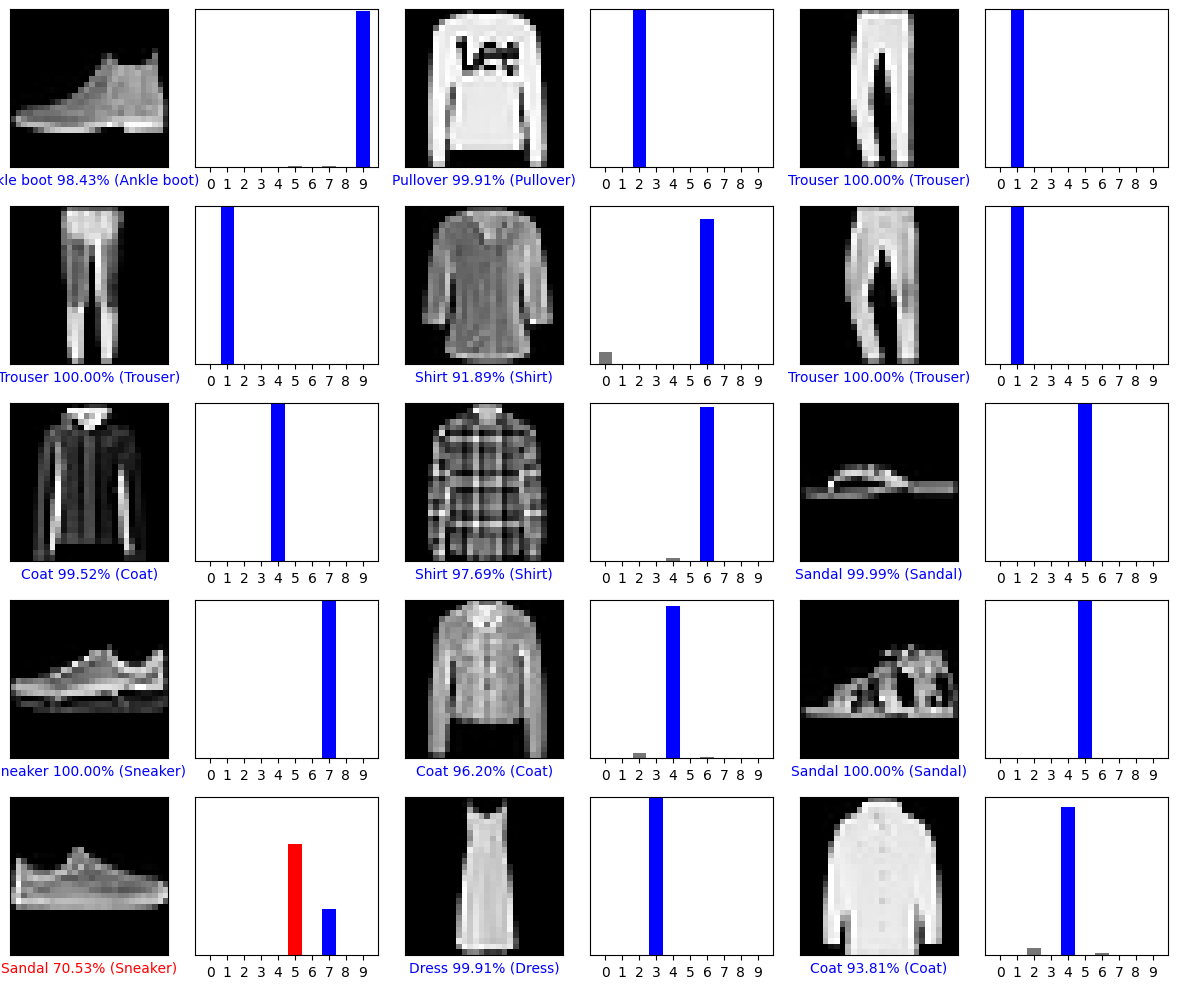

In [64]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

---
---

# **Using CNN**

In [66]:
# Build a simple CNN model
model = Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [67]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [68]:
# Train the model and capture the history
history = model.fit(train_images[..., np.newaxis], train_labels, epochs=10,
                    validation_data=(test_images[..., np.newaxis], test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 44ms/step - accuracy: 0.7520 - loss: 0.6771 - val_accuracy: 0.8481 - val_loss: 0.4124
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 71s 38ms/step - accuracy: 0.8796 - loss: 0.3299 - val_accuracy: 0.8776 - val_loss: 0.3258
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 70s 37ms/step - accuracy: 0.8994 - loss: 0.2769 - val_accuracy: 0.8939 - val_loss: 0.2985
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 74s 40ms/step - accuracy: 0.9102 - loss: 0.2392 - val_accuracy: 0.9018 - val_loss: 0.2692
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 73s 39ms/step - accuracy: 0.9216 - loss: 0.2140 - val_accuracy: 0.9070 - val_loss: 0.2566
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 38ms/step - accuracy: 0.9274 - loss: 0.1935 - val_accuracy: 0.9073 - val_loss: 0.2642
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 37ms/step - accuracy: 0.9356 - loss: 0.1770 - val_accuracy: 0.9104 - val_loss: 0.2640
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 70s 37ms/step - accuracy: 0.9380 -

In [69]:
# Plot the training and validation accuracy
def plot_accuracy(history):
    plt.figure(figsize=(8, 6))

    # Get training and validation accuracy
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    epochs = range(1, len(accuracy) + 1)

    # Plot the training and validation accuracy curves
    plt.plot(epochs, accuracy, 'b-', label='Training Accuracy')
    plt.plot(epochs, val_accuracy, 'r-', label='Validation Accuracy')

    # Add labels and title
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Show the plot
    plt.show()

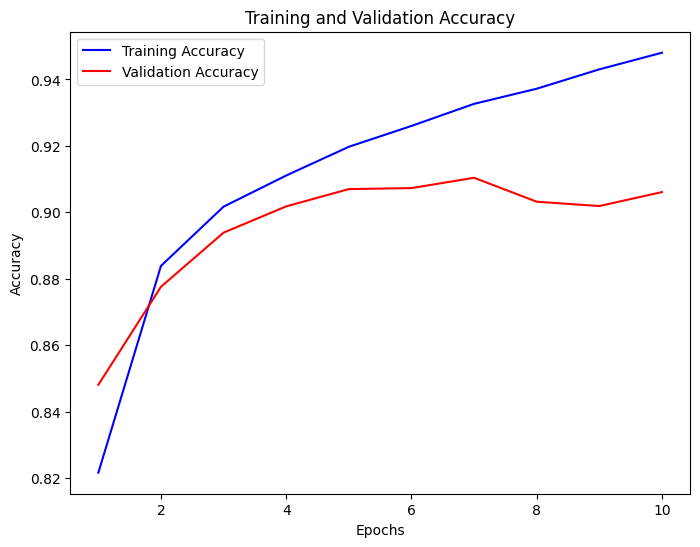

In [70]:
# Call the plot function
plot_accuracy(history)


In [71]:
import matplotlib.pyplot as plt

def plot_loss(history):
    # Extract loss and validation loss from history
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Create the plot
    epochs = range(1, len(loss) + 1)

    plt.figure(figsize=(8, 6))
    plt.plot(epochs, loss, 'purple', label='Training Loss')  # Purple for training loss
    plt.plot(epochs, val_loss, 'yellow', label='Validation Loss')  # Yellow for validation loss
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()





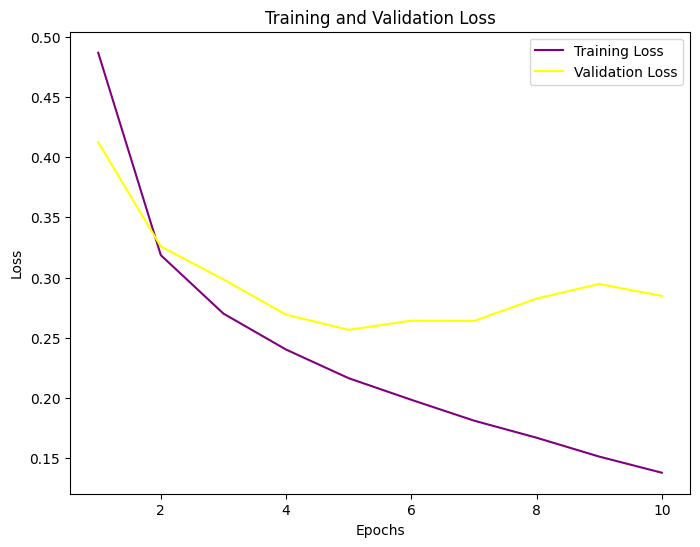

In [72]:
plot_loss(history)

---
---
---